In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from LearningAlgorithms import ClassificationAlgorithms

In [9]:
# General Plot settings:

In [10]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [11]:
# Loading the data:

In [12]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")

In [13]:
# dropping some column and insert it into df_train:

In [14]:
df_train = df.drop(["participant", "category", "set"], axis=1)

In [15]:
# initial splitting of the data. "x" holds the numerical values and "y" holds the exercise names:

In [16]:
x = df_train.drop(["label"], axis=1)
y = df_train["label"]

In [17]:
# 4 variables - 2 DF, 2 Pandas Series. 75% of the total DF is for training and 25% is for testing. "stratify" methods makes the data properly arranged (in respect to "y") in general since "train_test_split" makes the data random by default:

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

In [19]:
x_train

,acce_x,acce_y,acce_z,gyro_x,gyro_y,gyro_z,pca_1,pca_2,pca_3,acce_r,...,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-19 17:33:16.800,0.044966,-0.729516,0.153875,23.502193,-5.701669,-1.391100,0.274760,0.002245,-0.033941,0.746923,...,0.235926,289.174251,4.216748,0.459880,-36.582396,27.810967,-26.029368,29.108091,6.909835,3
2019-01-15 19:37:28.400,0.046367,-0.964470,0.014144,-27.106342,-5.041411,4.002810,0.350313,-0.086902,-0.047942,0.965688,...,0.532634,361.957413,65.850103,37.028618,58.620688,-39.163308,44.509841,52.721940,18.883458,0
2019-01-19 17:22:51.400,0.375352,0.791169,0.449213,6.805169,-5.046822,-1.962352,-0.207909,0.285290,0.116582,0.984190,...,0.611030,901.195192,-298.637483,-119.655077,45.670440,-170.740871,120.730945,15.463022,-5.064938,2
2019-01-11 16:24:45.400,0.044367,-1.233542,-0.057986,2.677950,-3.070809,3.796401,0.440726,-0.138933,-0.026633,1.235701,...,0.225092,298.993951,27.898708,6.545861,-2.708297,-55.463493,-9.581349,16.653542,1.415527,0
2019-01-20 17:31:03.400,-0.058843,-1.040965,-0.080392,1.006786,-1.945943,-0.246155,0.365539,-0.163365,-0.059405,1.045722,...,0.195813,233.341346,-7.248864,17.846796,-30.463345,22.832008,-8.905082,-3.851608,5.403792,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:55:50.000,-0.227150,0.758751,-0.251384,15.611756,0.933445,-22.659287,-0.266468,-0.230753,0.006185,0.830959,...,0.224031,363.426765,-12.387342,5.926513,4.281299,-82.725859,-1.229007,-12.009124,-11.774500,1
2019-01-15 14:06:54.200,0.071402,-1.308910,0.045379,26.814708,-8.389035,-12.571056,0.471914,-0.076742,-0.023744,1.311641,...,0.384841,301.123482,-10.662612,25.180426,7.276901,78.624759,-31.003564,-9.769925,-25.532918,0
2019-01-11 16:24:34.200,-0.047626,-0.903080,0.321965,-39.730589,2.114324,-11.411065,0.328736,0.079152,-0.163296,0.959939,...,0.437999,327.228982,68.740411,6.995489,65.598117,41.994127,-19.256168,-12.848075,-8.354428,3


In [20]:
x_test

,acce_x,acce_y,acce_z,gyro_x,gyro_y,gyro_z,pca_1,pca_2,pca_3,acce_r,...,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-14 13:27:05.000,-0.091875,0.624779,-0.391580,24.444167,-7.239013,-5.602389,-0.212448,-0.294041,0.096302,0.743051,...,0.300892,248.993238,38.683457,-8.791374,15.767705,-6.598377,-30.362690,-25.955082,15.011182,1
2019-01-14 13:57:35.600,-0.132043,0.914233,0.112817,-3.014059,-3.074463,-8.699491,-0.302523,0.004351,-0.038217,0.930583,...,0.271053,488.390952,-84.621273,57.916894,-5.486366,-53.217817,11.565810,-1.201181,-11.962877,1
2019-01-11 16:24:37.800,0.044199,-1.095219,-0.050170,-13.073737,-6.193956,-6.747921,0.393409,-0.129597,-0.030751,1.097258,...,0.498716,308.397364,-54.330536,14.797605,-76.404546,52.158661,8.623199,-19.524339,6.970028,0
2019-01-19 17:22:53.000,0.918433,-0.274413,0.006872,-8.058827,1.524559,2.551798,0.190988,0.084796,0.398393,0.958577,...,0.361846,898.033720,-102.182213,-153.336485,155.520840,8.674640,-80.126307,-18.693230,-1.629087,4
2019-01-15 19:12:12.400,0.368736,0.621699,0.630050,4.421008,-3.746559,0.768355,-0.146223,0.384141,0.062496,0.958873,...,0.315403,174.258769,-31.532909,19.542248,-7.798360,25.215105,2.024531,2.354893,3.229668,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-12 16:24:28.000,-0.013276,-0.730845,0.279724,26.103376,3.793862,6.579983,0.273402,0.065918,-0.087763,0.782660,...,0.416993,216.765255,11.603054,32.007701,-62.097947,-13.729325,-9.359292,0.255980,5.969099,3
2019-01-14 13:57:33.600,-0.021588,0.971798,0.325855,-1.798892,-3.079120,16.709695,-0.307227,0.150295,-0.034741,1.025202,...,0.357156,549.701933,78.527625,17.220846,-58.084145,58.346186,63.411059,47.895721,40.398174,2
2019-01-15 19:04:13.800,0.278978,0.563132,0.602616,-7.987382,-1.018759,1.980630,-0.135005,0.350595,0.016536,0.870686,...,0.636639,125.520013,-37.324097,35.802564,-21.544519,4.847998,4.235189,-0.397030,-2.846759,2


In [21]:
y_train

epoch (ms)
2019-01-19 17:33:16.800     row
2019-01-15 19:37:28.400    dead
2019-01-19 17:22:51.400    rest
2019-01-11 16:24:45.400    dead
2019-01-20 17:31:03.400     row
                           ... 
2019-01-14 13:55:50.000     ohp
2019-01-15 14:06:54.200     row
2019-01-11 16:24:34.200    dead
2019-01-15 19:32:46.800    dead
2019-01-16 19:26:34.400    dead
Name: label, Length: 2901, dtype: object

In [22]:
y_test

epoch (ms)
2019-01-14 13:27:05.000    bench
2019-01-14 13:57:35.600      ohp
2019-01-11 16:24:37.800     dead
2019-01-19 17:22:53.000     rest
2019-01-15 19:12:12.400    squat
                           ...  
2019-01-12 16:24:28.000     dead
2019-01-14 13:57:33.600      ohp
2019-01-15 19:04:13.800    squat
2019-01-11 16:19:48.200    squat
2019-01-15 19:30:53.600     dead
Name: label, Length: 967, dtype: object

In [23]:
# Plotting the total, training, and testing of the data:

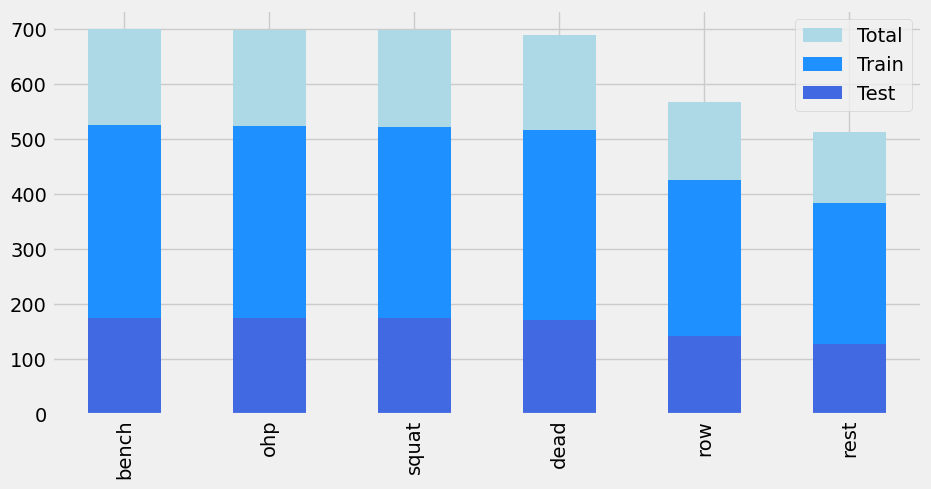

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [25]:
# Splitting the features, inserting those to its corresponding subsets:

In [26]:
# Splitting first by their respective features: original and the other features made by using different methods:

In [27]:
basic_features = ["acce_x", "acce_y", "acce_z", "gyro_x", "gyro_y", "gyro_z"]
square_features = ["acce_r", "gyro_r"]
pca_features = ["pca_1", "pca_2", "pca_3", ]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if (("_freq" in f) or ("_pse" in f))]
cluster_features = ["cluster"]

In [28]:
print(f"Basic features count: {len(basic_features)}")
print(f"Sqaured features count: {len(square_features)}")
print(f"PCA features count: {len(pca_features)}")
print(f"Time features count: {len(time_features)}")
print(f"Frequency features count: {len(freq_features)}")
print(f"Cluster features count: {len(cluster_features)}")

Basic features count: 6
Sqaured features count: 2
PCA features count: 3
Time features count: 16
Frequency features count: 88
Cluster features count: 1


In [39]:
# Making a subset features that increments how much data it holds in each subset:

In [40]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

In [41]:
feature_set_1

['gyro_x', 'gyro_y', 'acce_x', 'acce_y', 'acce_z', 'gyro_z']

In [42]:
feature_set_2

['gyro_x',
 'gyro_r',
 'gyro_y',
 'pca_3',
 'acce_r',
 'acce_x',
 'pca_2',
 'pca_1',
 'acce_y',
 'acce_z',
 'gyro_z']

In [43]:
feature_set_3

['gyro_x',
 'acce_y_temp_mean_ws_5',
 'acce_y_temp_std_ws_5',
 'pca_3',
 'acce_x',
 'gyro_x_temp_std_ws_5',
 'gyro_z',
 'gyro_r',
 'gyro_r_temp_std_ws_5',
 'acce_z_temp_std_ws_5',
 'gyro_r_temp_mean_ws_5',
 'gyro_z_temp_std_ws_5',
 'acce_y',
 'acce_r_temp_std_ws_5',
 'gyro_y_temp_std_ws_5',
 'acce_z_temp_mean_ws_5',
 'gyro_x_temp_mean_ws_5',
 'acce_x_temp_std_ws_5',
 'gyro_y',
 'gyro_z_temp_mean_ws_5',
 'acce_r',
 'pca_2',
 'gyro_y_temp_mean_ws_5',
 'pca_1',
 'acce_x_temp_mean_ws_5',
 'acce_z',
 'acce_r_temp_mean_ws_5']

In [44]:
feature_set_4

['acce_y_freq_1.786_Hz_ws_14',
 'gyro_z_freq_0.0_Hz_ws_14',
 'gyro_x_freq_2.5_Hz_ws_14',
 'gyro_r',
 'acce_y_pse',
 'gyro_x_freq_1.786_Hz_ws_14',
 'acce_r_freq_0.714_Hz_ws_14',
 'acce_r_freq_2.143_Hz_ws_14',
 'gyro_r_max_freq',
 'gyro_r_freq_0.0_Hz_ws_14',
 'gyro_r_freq_1.429_Hz_ws_14',
 'gyro_y_temp_std_ws_5',
 'gyro_r_freq_2.143_Hz_ws_14',
 'acce_z_temp_mean_ws_5',
 'acce_z_freq_0.0_Hz_ws_14',
 'acce_z_freq_0.357_Hz_ws_14',
 'gyro_x_temp_mean_ws_5',
 'acce_x_freq_0.0_Hz_ws_14',
 'acce_r_freq_0.357_Hz_ws_14',
 'acce_x_temp_std_ws_5',
 'acce_x_temp_mean_ws_5',
 'acce_y_freq_0.0_Hz_ws_14',
 'gyro_y',
 'gyro_z_temp_mean_ws_5',
 'acce_y_freq_2.5_Hz_ws_14',
 'gyro_z_freq_0.357_Hz_ws_14',
 'gyro_x_freq_0.357_Hz_ws_14',
 'gyro_r_pse',
 'gyro_y_freq_0.357_Hz_ws_14',
 'acce_r_freq_weighted',
 'acce_x_pse',
 'acce_r_temp_mean_ws_5',
 'acce_x_max_freq',
 'acce_z_freq_1.786_Hz_ws_14',
 'gyro_r_freq_1.786_Hz_ws_14',
 'gyro_z',
 'acce_z_freq_1.429_Hz_ws_14',
 'gyro_y_pse',
 'gyro_x_freq_0.714_Hz_ws

In [45]:
# Perform forward feature selection using simple decision tree:

In [46]:
# Making an instance of the ClassificationAlgorithms and initiating the "max_feature" = 10. The 10 means means 10 iterations to train:

In [47]:
learner = ClassificationAlgorithms()
max_features = 10

In [48]:
# Starting the training using "forward_selection" method of the ClassificationAlgorithms class:

In [49]:
selected_features, ordered_features, ordered_scores = learner.forward_selection(
    max_features, x_train, y_train
)

0
1
2
3
4
5
6
7
8
9


In [50]:
selected_features

['pca_1',
 'gyro_r_freq_0.0_Hz_ws_14',
 'acce_z_freq_0.0_Hz_ws_14',
 'acce_x_freq_0.0_Hz_ws_14',
 'acce_r_freq_0.357_Hz_ws_14',
 'acce_x_freq_0.357_Hz_ws_14',
 'gyro_x',
 'acce_x_freq_1.429_Hz_ws_14',
 'gyro_y_freq_1.429_Hz_ws_14',
 'acce_x']

In [51]:
ordered_features

['pca_1',
 'gyro_r_freq_0.0_Hz_ws_14',
 'acce_z_freq_0.0_Hz_ws_14',
 'acce_x_freq_0.0_Hz_ws_14',
 'acce_r_freq_0.357_Hz_ws_14',
 'acce_x_freq_0.357_Hz_ws_14',
 'gyro_x',
 'acce_x_freq_1.429_Hz_ws_14',
 'gyro_y_freq_1.429_Hz_ws_14',
 'acce_x']

In [52]:
ordered_scores

[0.8876249569114099,
 0.9724233023095484,
 0.98931402964495,
 0.9982764563943468,
 0.9989658738366081,
 0.9993105825577387,
 0.9993105825577387,
 0.9993105825577387,
 0.9993105825577387,
 0.9993105825577387]

In [53]:
# Plotting the result so that it is easier to understand:

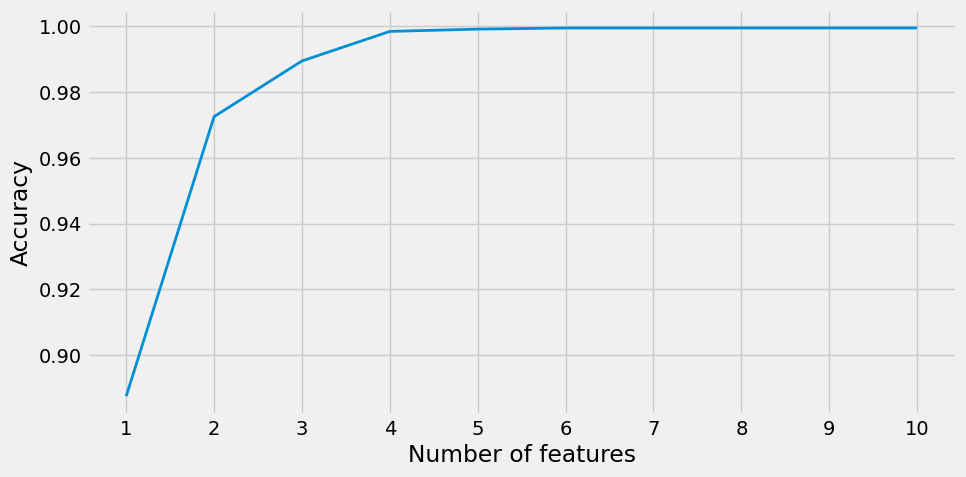

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [55]:
# With this, can see the accuracy of the prediction as we increase the column involves to be predicted by the program. 
# The program manage to get 88% correct just on "pca_1" column alone.
# Adding "gyro_r_freq_0.0_Hz_ws_14" shoots up the accuracy to 97%.
# And it reaches the 99.31% of accuracy at 6 columns selected.

In [56]:
selected_features = ['pca_1',
 'gyro_r_freq_0.0_Hz_ws_14',
 'acce_z_freq_0.0_Hz_ws_14',
 'acce_x_freq_0.0_Hz_ws_14',
 'acce_r_freq_0.357_Hz_ws_14',
 'acce_x_freq_0.357_Hz_ws_14',
 'gyro_x',
 'acce_x_freq_1.429_Hz_ws_14',
 'gyro_y_freq_1.429_Hz_ws_14',
 'acce_x']

In [57]:
# Grid search for the best hyperparameters and model selection:

In [58]:
# Making a list consistin of the 4 feature set and the "selected_features". Another list that contains their corresponding names:

In [64]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features
]

feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features"
]

In [67]:
# Setting the iteration to 1 first to train the neural network first and to see how it goes since this takes a while to finish if we do a lot of iterations and the code is wrong
# empty DF that will hold the data later:

In [68]:
iterations = 1
score_df = pd.DataFrame()

In [69]:
# This for loop loops through the 2 list that was declared earlier. At first, it only has the Feature Set 1. After that, it will train in Feature Set 2 until the Selected Features which holds the column with the best score. This loop also uses a lot of functions and methods from the "ClassificationAlgorithms" Class
# Just copied it like what the tutorial did:

In [70]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = x_train[possible_feature_sets[i]]
    selected_test_X = x_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [71]:
# A thing to note: In the forward_selection, the data selected in there was the "train" data. That's why it is a given that it will perform really well. 
# As for this Grid Search, this For Loop uses the "test" data and we'll see what part of the training will result to the highest accuracy score.

In [72]:
# Create a grouped bar plot to compare the results:

In [73]:
# Sorting the score DF from highest to lowest.

In [74]:
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
0,NN,Feature Set 4,0.995863
1,RF,Feature Set 4,0.994829
1,RF,Selected Features,0.990693
0,NN,Feature Set 3,0.989659
3,DT,Feature Set 4,0.985522
3,DT,Selected Features,0.982420
1,RF,Feature Set 3,0.981386
2,KNN,Feature Set 4,0.968976
0,NN,Selected Features,0.965874
3,DT,Feature Set 3,0.957601


In [75]:
# Plotting to understand it easier.

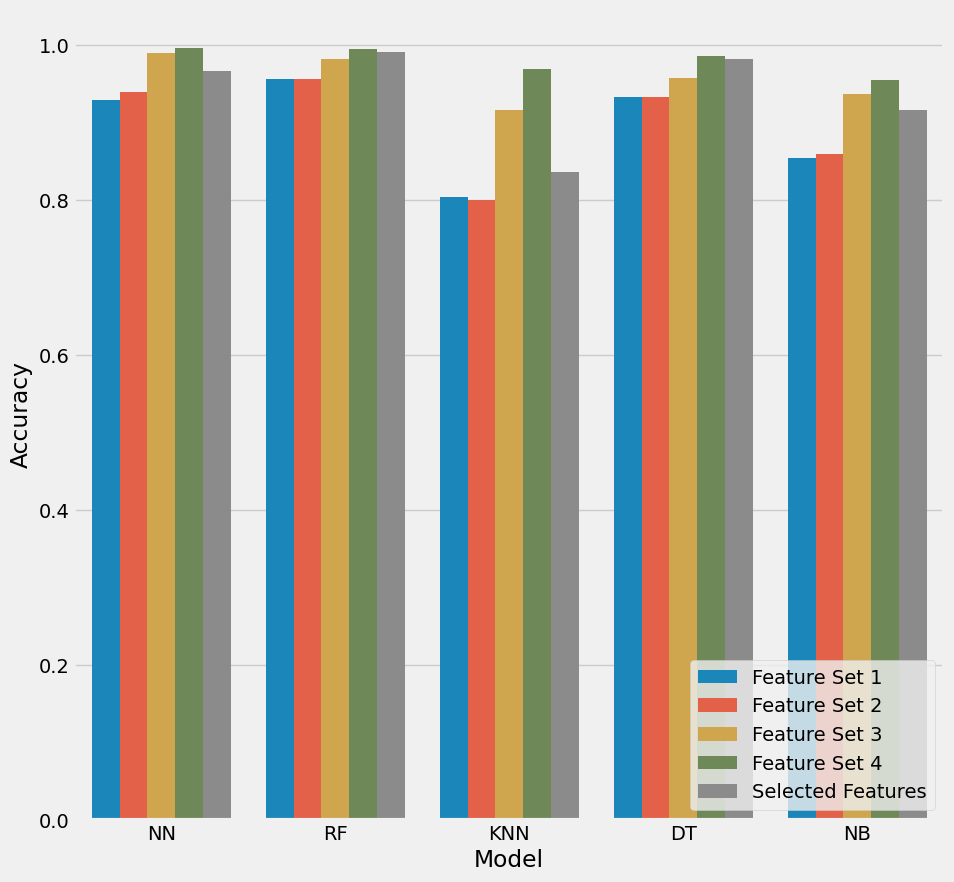

In [76]:
plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

In [77]:
# With this we can how each feature set and the selected feature performs in each training. We can conclude here that Features 1 and 2 performs the least in all of the test. Selected features performs really well too, especially in RF training. Features Set 4 performs the best to all of the training method. Remember, Feature Set 4 has the _freq and _pse columns which we got from doing the Fourier Transformation. We can say that Fourier Transformation really does well in our data to be interpreted right by the training methods.

In [78]:
# Select best model and evaluate results:

In [79]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
    x_train[feature_set_4], y_train, x_test[feature_set_4], gridsearch=True
)

In [80]:
# Storing the accuracy_score to a variable:

In [81]:
accuracy =accuracy_score(y_test, class_test_y)

In [82]:
accuracy

0.9968976215098242

In [84]:
# Storing column names to classes variable.
# Making a confusion matrix to get a better a understanding where did the training method get it right and wrong labels:

In [85]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

In [89]:
# Copied Plotting code for plotting a nice matrix representation (from "cm") of the data.. Kind of complex:

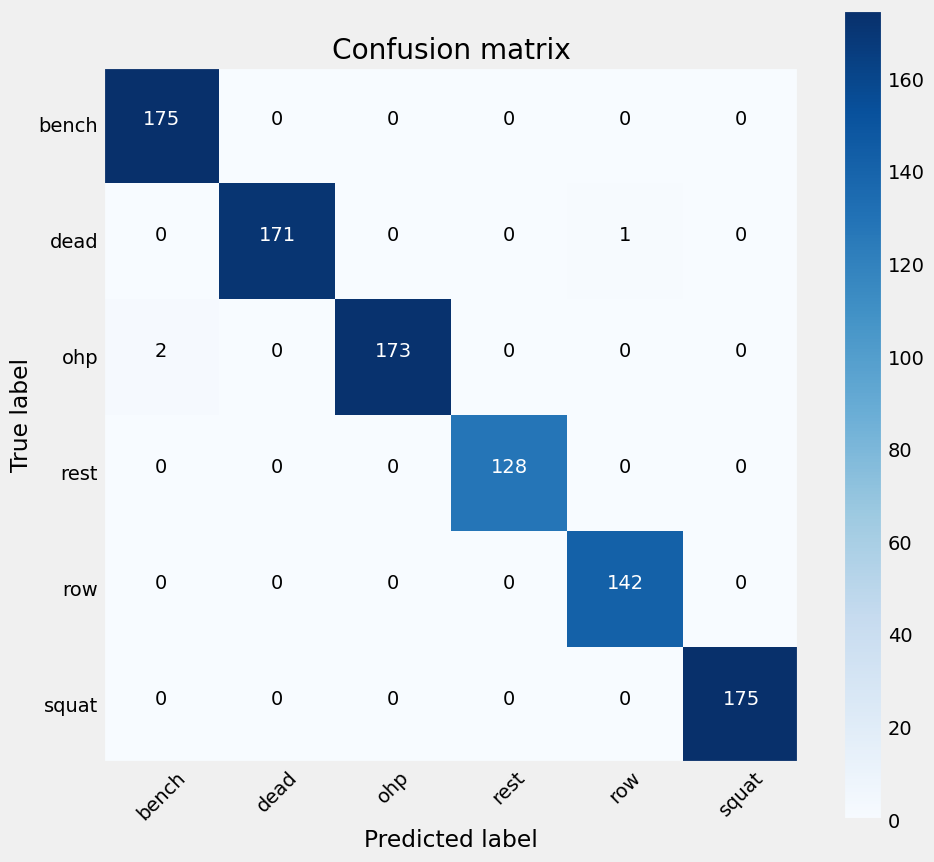

In [90]:
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [91]:
# With this graph, we can see the instance where the training model predicts wrong and to what label it did predict it wrong. For exmaple: There's a two instances where the model was given an Overhead Press (ohp) data but predicts it as bench press since those two exercises are almost identical (movement wise) for the sensor. There's also a one intance where the model was given a data for dead lift but it predicted it as a row since those two are also alike in movements. 
# Overall, this is a good result.

In [92]:
# Select train and test data based on participant:

In [93]:
# Basically, what this section of the code does is we're not putting all participants data to be train. The data that will be used for the training are for Participants B - E. And Participant A will be used for the test. This will give us a better result since the model doesn't have the data for the Participant A and we'll see a more realistic result in predicting result of accuracy.

In [94]:
# Copying the original DF with some columns drop:

In [95]:
participant_df = df.drop(["set", "category"], axis=1)

In [96]:
# Initiating x - train, test and y - train, test again. This time setting the train data for Participant B - E and test data for Participant A. After doing that, dropping the Participant column since it has been filtered out correctly already. Leaving the numerical values and the label (exercise names) which what we only need:

In [97]:
x_train = participant_df[participant_df["participant"] != "A"].drop("label", axis=1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]

x_test = participant_df[participant_df["participant"] == "A"].drop("label", axis=1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

x_train = x_train.drop(["participant"], axis=1)
x_test = x_test.drop(["participant"], axis=1)

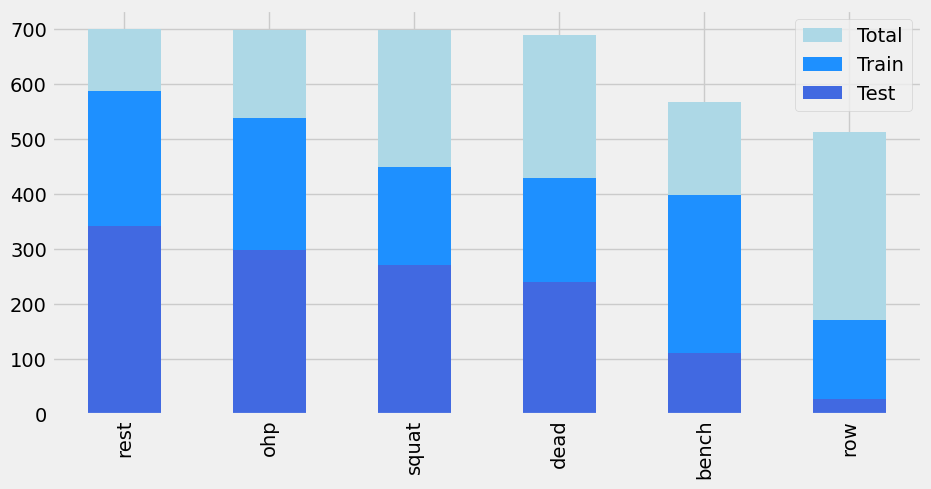

In [105]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [106]:
# We can see that Participant A didn't do a lot of Row exercise. 

In [107]:
# Use best model again and evaluate results. Just copied the code from section: Select best model and evaluate results.
# This will give a proper result since what we want for a our model to do is for it to be able to cater new people (participant) to predict automatically the exercise they doing. Not predicting existing participant exercise since it already has the data for them: 

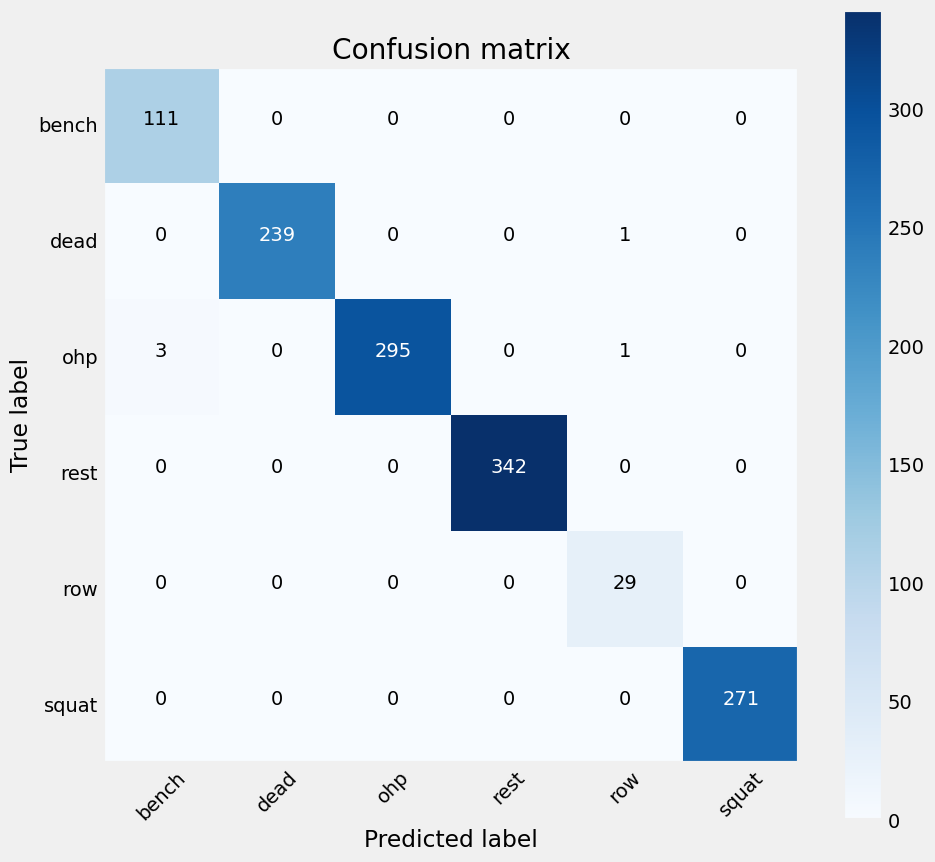

In [108]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
    x_train[feature_set_4], y_train, x_test[feature_set_4], gridsearch=True
)

    # Getting the accuracy:
accuracy =accuracy_score(y_test, class_test_y)

    # Confusion matrix: To get an accurate understanding where did it get right and wrong labels.
    # Storing all the column names to classes.
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

    # create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [110]:
accuracy

0.9961300309597523

In [111]:
# The test result is still really good. This makes the model able to predict new participant (people) the right exercise it is doing which it has no data to.
# Accuracy of 99.61%
# Predicted ohp wrong 3 times as bench press.
# Predicted dead lift and ohp wrong once each as row

In [112]:
# Finally, Try a simpler model with the selected features.
# Remember, the selected features has 10 columns in which the "forward_selection" function of the ClassificationAlgorithms class has resulted into:

In [113]:
# Will be testing using "random_forest" (RF) instead of "feedforward_neural_network" (NN) since it is simpler test:

In [114]:
# And just copying the code from the section: Use best model again and evaluate results. Just changing the model to use for predictions:

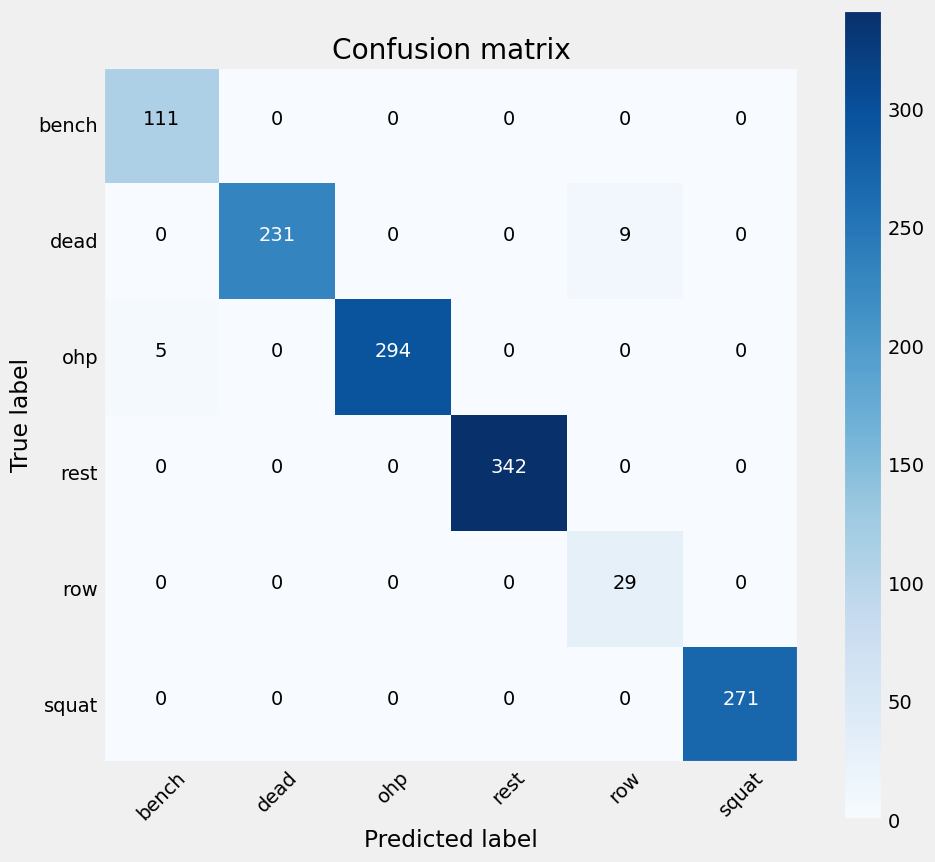

In [116]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    x_train[selected_features], y_train, x_test[selected_features], gridsearch=True
)

    # Getting the accuracy:
accuracy =accuracy_score(y_test, class_test_y)

    # Confusion matrix: To get an accurate understanding where did it get right and wrong labels.
    # Storing all the column names to classes.
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

    # create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [117]:
accuracy

0.9891640866873065

In [118]:
# Using simpler model still leads to good result overall. It manages to predicts 98.91% correctly.
# Predicts ohp wrong 5 times as bench press.
# Predicts dead lift wrong 9 time as row.